# **💉💉The Vaccine Uptake Prediction**

## STEP 1: **Business understanding**
### **Business Overview**
A **vaccine** is a medical tool that helps the body build immunity against diseases. Vaccines not only protect individuals but also protect communities through **herd immunity**, where enough people are immunized to reduce the overall spread of disease.


There are different types of vaccines, such as the **seasonal flu vaccine** (for common flu strains) and the **H1N1 vaccine** (for swine flu). These play a key role in preventing large outbreaks and saving lives.


In 2009, the world faced a pandemic caused by the **H1N1 influenza virus (swine flu)**, which led to an estimated **151,000–575,000 deaths** globally in its first year. A vaccine for H1N1 was introduced in **October 2009**. Shortly after, the **U.S. National 2009 H1N1 Flu Survey** was conducted to measure who received the **H1N1** and **seasonal flu** vaccines.


The survey also collected information on people’s **demographics, health status, behaviors, and opinions**. Studying this data helps us understand why some groups chose vaccination while others did not, and provides guidance for future **public health efforts**.

### **Problem Statement**
Although vaccines like the seasonal flu and H1N1 were available in 2009, uptake was low, especially for H1N1. This reflects vaccine hesitancy, which weakens herd immunity and increases disease risk.

The key challenge is to understand the factors influencing vaccination decisions—such as demographics, health beliefs, or doctor recommendations—and to build predictive models. These insights can help identify hesitant groups and support better public health strategies in future pandemics.

### **Business Objectives**

#### **Main Objective**
To build a predictive model that identifies the key factors influencing **H1N1 and seasonal flu vaccine** uptake, to understand patterns of vaccine hesitancy, and provide insights that can guide future public health communication and decision-making.

#### **Specific Objectives** (NB// focused on H1N1 vaccine)
1. To measure the overall *uptake rate* of the H1N1 vaccine in the population.
2. To analyse the effect of *demographic factors*(i.e., age,education,income) on vaccine uptake.
3. To evaluate the role of *Doctor's recommendations* in influencing vaccination decisions.
4. To examine the impact of *opinions and beliefs* (e.g., vaccine effectiveness, risk perceptions, safety concerns).
5. To investigate the influence of *health status and behaviours*(e.g., chronic conditions, mask use, handwashing).
6. To build a *predictive machine learning model* for H1N1 vaccine uptake.
7. To identify the *Top features* that drive vaccination decisions and hesitancy.
#### **Research Questions**
1. What percentage of people in the survey received the H1N1 vaccine?
2. How do demographic factors (e.g., education, income, marital status) influence H1N1 vaccine uptake?
3. Does receiving a doctor’s recommendation increase the likelihood of getting the H1N1 vaccine?
4. How do perceptions of vaccine effectiveness, risk of illness, and safety concerns affect H1N1 vaccination decisions?
5. Do people with chronic medical conditions or protective behaviors (e.g., mask use, handwashing) show higher H1N1 vaccination uptake?
6. Can we build a reliable machine learning model to predict whether someone received the H1N1 vaccine?
7. Which factors are the strongest predictors of H1N1 vaccine uptake?
#### **Success Criteria**
##### Business success criteria:
* Gain a clear understanding of H1N1 vaccine uptake patterns across different groups of people.
* Identify key factors that influence vaccine decisions.
* Provide insights that can guide public health communication strategies to reduce vaccine hesitancy.
##### Data success criteria:
* Perform thorough EDA with at least 10 meaningful visualizations that answer the research questions.
* Build at least two classification models to predict H1N1 vaccine uptake.
* Identify and rank the most important features influencing H1N1 vaccination.
* Ensure results are interpretable and clearly communicated for both technical and non-technical audiences.
  


## STEP 2: Data Understanding

In [1]:
# import necessary libraries  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
%matplotlib inline

In [2]:
# Load the H1N1 and seasonal FLU vaccines dataset
data = pd.read_csv('H1N1_Flu_Vaccines.csv')
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [3]:
# check the basic info of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [4]:
# check if the data has duplicated cols
data.duplicated().any()

False

In [5]:
# select features/columns Necessary for predicting the H1N1 vaccine uptake
H1N1_df= data.drop(columns =['respondent_id',
                            'doctor_recc_seasonal',
                            'opinion_seas_vacc_effective',
                            'opinion_seas_risk', 
                            'opinion_seas_sick_from_vacc',
                            'seasonal_vaccine']
                  )
H1N1_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [6]:
# check the columns in the H1N1 data
H1N1_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation',
       'h1n1_vaccine'],
      dtype='object')

In [7]:
H1N1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  chronic_med_condition        25736 non-null  float64
 11  child_under_6_months         25887 non-null  float64
 12  health_worker                25903 non-null  float64
 13  health_insurance

In [8]:
# check the shape of the data
H1N1_df.shape

(26707, 32)

In [9]:
# check the statistical summary of the data
H1N1_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


## STEP 3: Data Preparation

In [15]:
# check for missing values 
null_percentages = (H1N1_df.isnull().sum() / len(H1N1_df)) * 100
null_percentages = np.round(null_percentages[null_percentages > 0].sort_values(ascending=False),2)
null_percentages

employment_occupation          50.44
employment_industry            49.91
health_insurance               45.96
income_poverty                 16.56
doctor_recc_h1n1                8.09
rent_or_own                     7.65
employment_status               5.48
marital_status                  5.27
education                       5.27
chronic_med_condition           3.64
child_under_6_months            3.07
health_worker                   3.01
opinion_h1n1_sick_from_vacc     1.48
opinion_h1n1_vacc_effective     1.46
opinion_h1n1_risk               1.45
household_children              0.93
household_adults                0.93
behavioral_avoidance            0.78
behavioral_touch_face           0.48
h1n1_knowledge                  0.43
h1n1_concern                    0.34
behavioral_large_gatherings     0.33
behavioral_outside_home         0.31
behavioral_antiviral_meds       0.27
behavioral_wash_hands           0.16
behavioral_face_mask            0.07
dtype: float64

In [21]:
# drop the employment_occupation and the employment industry column
H1N1_df.drop(columns = ['employment_occupation', 'employment_industry'], inplace = True)

In [24]:
# Fill the missing values in  categorical columns with an unknown placeholder.
# categorical (object/string) columns
cat_cols = H1N1_df.select_dtypes(include="object").columns

# 2. Fill missing values in these categorical columns with "Unknown"
H1N1_df.loc[:, cat_cols] = H1N1_df[cat_cols].fillna("Unknown")

# 3. Double-check if any categorical columns still have missing values
print(H1N1_df[cat_cols].isnull().sum())

age_group            0
education            0
race                 0
sex                  0
income_poverty       0
marital_status       0
rent_or_own          0
employment_status    0
hhs_geo_region       0
census_msa           0
dtype: int64


In [26]:
# Check remaining columns with missing values
missing_cols = H1N1_df.isnull().sum()

# Filter only columns that still have missing values
missing_cols = missing_cols[missing_cols > 0]

# Print them nicely
print("Columns with missing values:\n")
print(missing_cols)


Columns with missing values:

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
household_adults                 249
household_children               249
dtype: int64


In [28]:
# list of columns with <5% missing values (from your earlier summary)
cols_less_5 = [
    "chronic_med_condition", "child_under_6_months", "health_worker",
    "opinion_h1n1_sick_from_vacc","opinion_h1n1_vacc_effective", "opinion_h1n1_risk",
    "household_children", "household_adults","behavioral_avoidance", "behavioral_touch_face",
    "h1n1_knowledge", "h1n1_concern","behavioral_large_gatherings", "behavioral_outside_home",
    "behavioral_antiviral_meds", "behavioral_wash_hands","behavioral_face_mask"]

# drop rows where any of these are missing
H1N1_df = H1N1_df.dropna(subset=cols_less_5)


In [30]:
# fill the null values with median
H1N1_df['doctor_recc_h1n1'] = H1N1_df['doctor_recc_h1n1'].fillna(H1N1_df['doctor_recc_h1n1'].median())
H1N1_df['health_insurance'] = H1N1_df['health_insurance'].fillna(H1N1_df['health_insurance'].median())


In [32]:
#Check if there are any cols with missing vals
H1N1_df.isnull().sum().any()

False

In [34]:
# check the size of the clean data 
H1N1_df.shape

(24828, 30)

## STEP 4 : EDA Analysis and Modelling  On The H1N1_df Data

### Q1 What percentage of people in the survey received the H1N1 vaccine?

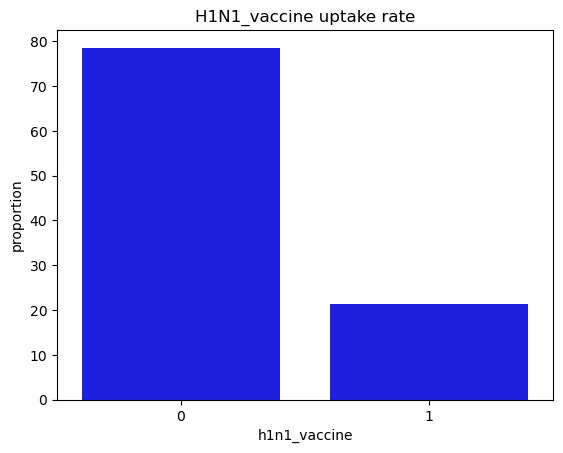

In [38]:
# h1n1 uptake rate
data = H1N1_df['h1n1_vaccine'].value_counts(normalize = True)*100
#plot the rate uptake
sns.barplot(data = data, color = 'blue')
plt.title('H1N1_vaccine uptake rate')
plt.show()

* **finding:** 
> The H1N1 vaccine uptake output is imbalance; where people who did not take the vaccine percentage (0) and the ones who took the vaccine percentage (1)  have a very wide difference 

### Q2 How do demographic factors (e.g., education, income, marital status) influence H1N1 vaccine uptake?

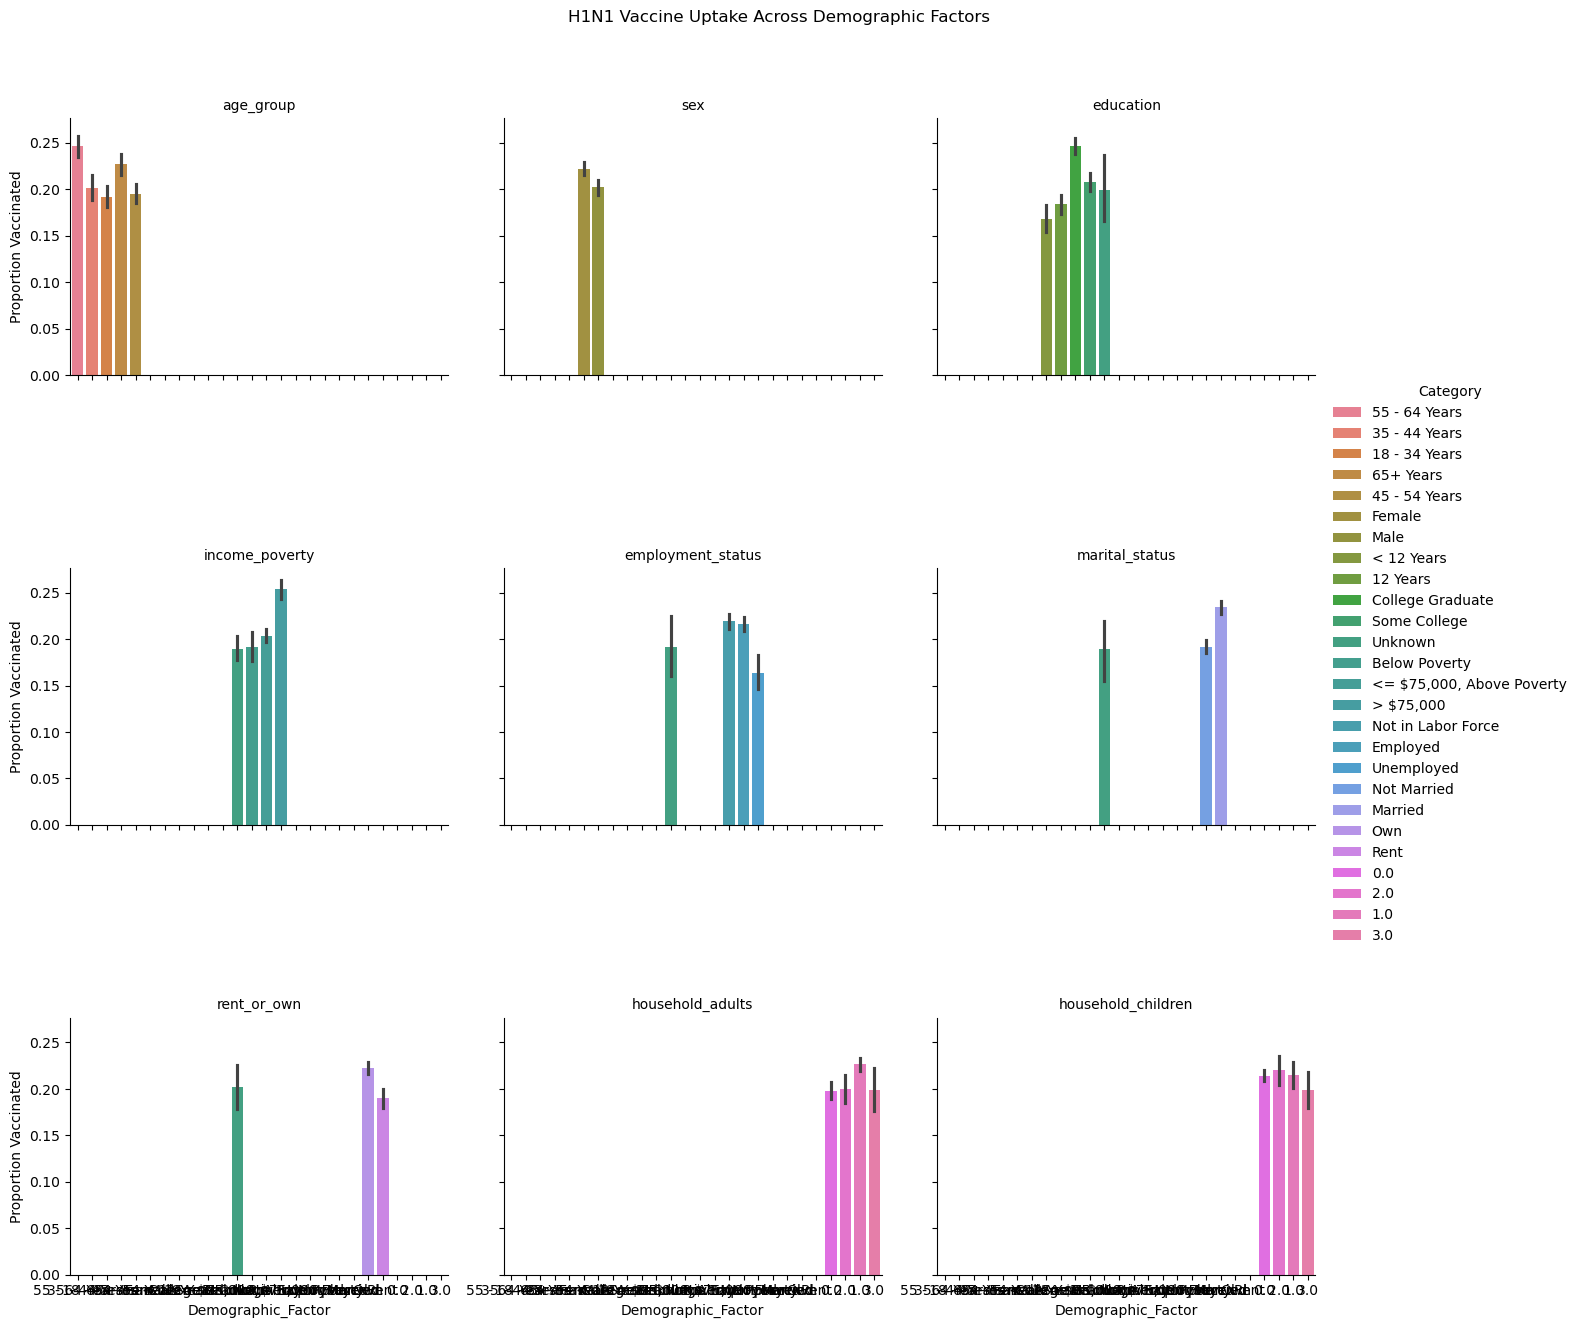

In [42]:
# select the demographic factors
demo_cols = ['age_group', 'sex', 'education', 'income_poverty', 'employment_status',
            'marital_status', 'rent_or_own', 'household_adults', 'household_children'
            ]
# melt it into a long format
df_melted = H1N1_df.melt( id_vars = 'h1n1_vaccine',
                         value_vars = demo_cols,
                         var_name = 'Demographic_Factor',
                         value_name = 'Category'
                        )
# plot  the uptake of h1n1_vaccine with each factor 
g = sns.catplot(
    data=df_melted, 
    x="Category", 
    y="h1n1_vaccine", 
    col="Demographic_Factor",
    hue = "Category",
    kind="bar", 
    col_wrap=3, 
    height=4.5, 
    aspect=1
)
g.set_titles("{col_name}")
g.set_axis_labels("Demographic_Factor", "Proportion Vaccinated")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("H1N1 Vaccine Uptake Across Demographic Factors")
plt.show()


* **Finding**
* > Age Group:
Older respondents (45-64, 65+ years) show a higher vaccine uptake than the younger groups(18-34 years), who are less likely to be vaccinated.
* > Sex:
Females have a  slightly higher uptake than males.
The difference seems small but noticeable.
* > Education: Higher education levels (College Graduate) have a higher uptake of the vaccine than those with ≤12 years of education.
* > 
 

### Q3 Does receiving a doctor’s recommendation increase the likelihood of getting the H1N1 vaccine?

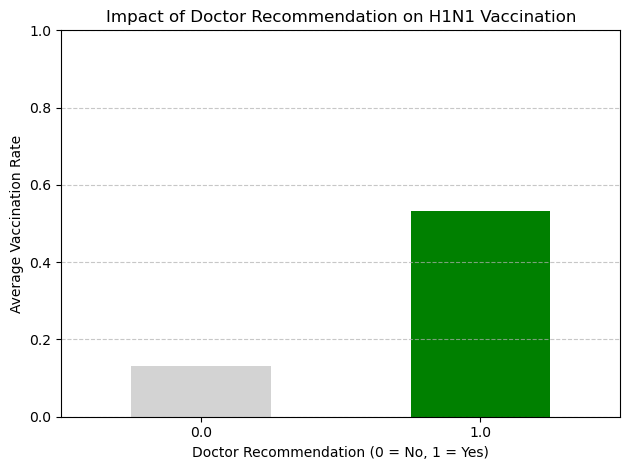

In [45]:
# group the doctor_reccommendation col with the vaccine .
vaccination_rates = H1N1_df.groupby('doctor_recc_h1n1')['h1n1_vaccine'].mean()

# plot the data output
vaccination_rates.plot(kind='bar', color=['lightgray', 'green'])

# Add labels and title
plt.xlabel('Doctor Recommendation (0 = No, 1 = Yes)')
plt.ylabel('Average Vaccination Rate')
plt.title('Impact of Doctor Recommendation on H1N1 Vaccination')
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Because vaccination rates are between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* **Findings**
>

### Q4 How do perceptions of vaccine effectiveness, risk of illness, and safety concerns affect H1N1 vaccination decisions?

In [48]:
# place the opinion_h1n1_risk , opinion_h1n1_vacc_eeffective and opinion_h1n1_sick_from_vacc in a list 
opinion_cols = ['opinion_h1n1_risk',
               'opinion_h1n1_vacc_effective',
               'opinion_h1n1_sick_from_vacc']
# check the corr()
H1N1_df[["h1n1_vaccine"] + opinion_cols].corr()

,h1n1_vaccine,opinion_h1n1_risk,opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc
h1n1_vaccine,1.000000,0.328552,0.271724,0.075354
opinion_h1n1_risk,0.328552,1.000000,0.266617,0.335247
opinion_h1n1_vacc_effective,0.271724,0.266617,1.000000,0.059850
opinion_h1n1_sick_from_vacc,0.075354,0.335247,0.059850,1.000000


In [49]:
# conduct a logistic regression  that aids in understanding how opinions influence vaccination (Via coefficients)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Features and target
X = H1N1_df[opinion_cols]
y = H1N1_df["h1n1_vaccine"]

# (Optional but recommended) Scale features for stability
scaler = StandardScaler()         # to normalize/ make the scale uniform.
X_scaled = scaler.fit_transform(X)

# Fit logistic regression model
log_reg = LogisticRegression(max_iter=1000) # to give the regression  enough iterations to converge
log_reg.fit(X_scaled, y)

# Print coefficients
coef_df = pd.DataFrame({
    "Feature": opinion_cols,
    "Coefficient": log_reg.coef_[0]
})
print("Intercept:", log_reg.intercept_[0])
print(coef_df)


Intercept: -1.6101495621820643
                       Feature  Coefficient
0            opinion_h1n1_risk     0.681612
1  opinion_h1n1_vacc_effective     0.745770
2  opinion_h1n1_sick_from_vacc    -0.080036


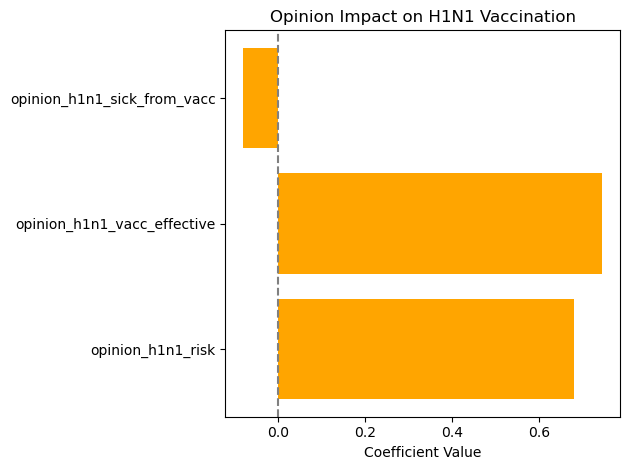

In [59]:
# plot the coefficients 
import matplotlib.pyplot as plt
import pandas as pd

# Define your features and coefficients
features = ["opinion_h1n1_risk", "opinion_h1n1_vacc_effective", "opinion_h1n1_sick_from_vacc"]
coefficients = [0.681612, 0.745770, -0.080036]

# Create a DataFrame
coef_df = pd.DataFrame({"Feature": features, "Coefficient": coefficients})

# Plot
plt.barh(coef_df["Feature"], coef_df["Coefficient"], color='orange')
plt.xlabel("Coefficient Value")
plt.title("Opinion Impact on H1N1 Vaccination")
plt.axvline(0, color='gray', linestyle='--')  # Reference line at zero
plt.tight_layout()
plt.show()


* **Findings**
>

### Q5 Do people with chronic medical conditions or protective behaviors (e.g., mask use, handwashing) show higher H1N1 vaccination uptake?

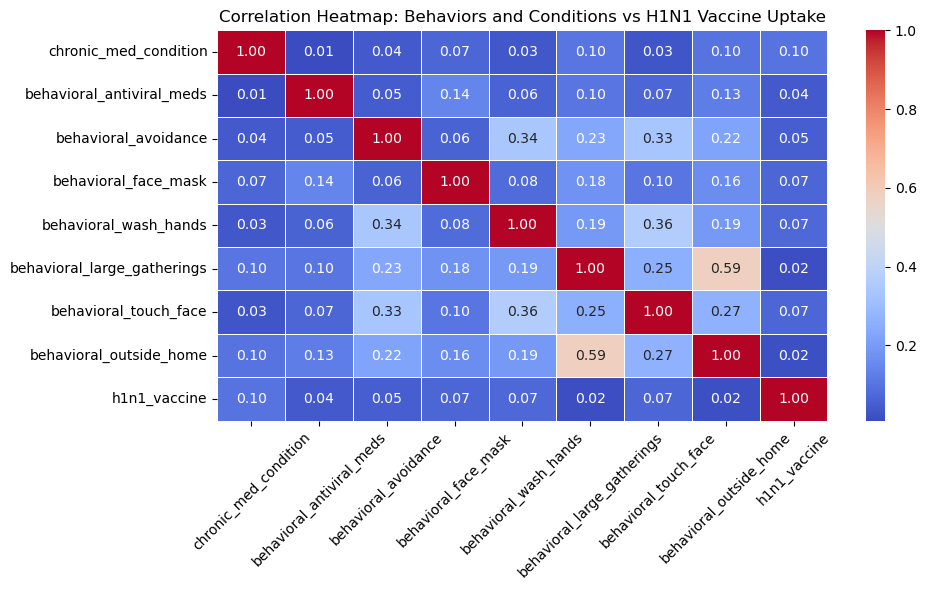

In [65]:
# create a correlation between the chronic medical conditions , protective behaviors and the target varviable (h1n1_vaccine)
cols_selected = ['chronic_med_condition', 'behavioral_antiviral_meds',
                'behavioral_avoidance', 'behavioral_face_mask', 
                'behavioral_wash_hands', 'behavioral_large_gatherings',
                'behavioral_touch_face', 'behavioral_outside_home',
                'h1n1_vaccine']
data = H1N1_df[cols_selected]
correlation_matrix = data.corr()
# plot the correlation 
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Behaviors and Conditions vs H1N1 Vaccine Uptake')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* **Findings**
* > People with chronic medical conditions were slightly more likely to take the H1N1 vaccine (r = 0.10).
* > Protective behaviors such as mask use (r = 0.07), frequent handwashing (r = 0.07), and avoiding crowds (r = 0.05) also showed small positive links to vaccination.
* > However, the effects were weak overall, meaning that while health risks and protective habits encouraged uptake, they were not strong predictors of vaccination behavior.

### Q6 Can we build a reliable machine learning model to predict whether someone received the H1N1 vaccine?

In [95]:
# Assign data to the X and y variables

X = H1N1_df.drop('h1n1_vaccine', axis =1)
Y = H1N1_df['h1n1_vaccine']
# Data preparation for Modelling

# identify the categorical and Numerical features
Cat_cols = X.select_dtypes(include=['object']).columns
Num_cols = X.select_dtypes(include=['Int64', 'float64']).columns

# Encode the Categorical variables
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder(handle_unknown= 'ignore', sparse_output=False)
X_cat = encoder.fit_transform(X[Cat_cols])

#Scale the numeric Variables
Scaler = StandardScaler()
X_num = Scaler.fit_transform(X[Num_cols])

#Combine the categorical data and the numerical column
X_clean = np.hstack([X_cat, X_num])

In [99]:
# split the data 
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X_clean, y, random_state= 0)
# flatten the y_train
y_train = y_train.ravel()

# handle the imbalance of the target variable
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.